## First attempt at simulating coral restoration model

ODEs: dC/dt = rCT + zrT - dC - aMC, dM/dt = aMC - (gM/(M+T)) + yMT, dT/dt = -dM/dt - dC/dt

In [22]:
import numpy as np
import scipy.integrate as spi
import pandas as pd
import matplotlib.pyplot as plt
#formats the output of a plot, keeps the plot attached to the cell
%matplotlib inline 

In [2]:
a = [0.1, 0.3, 0.5]  # rate macroalgae overgrow coral
g = [0.1, 0.3, 0.5]  # grazing rate
z = [0, 0.05, 0.25, 0.5] #rate coral larvae recruit to + overgrow turf
r = 0.55 # rate coral overgrow turf
d = 0.24 # natural coral mortality rate
y = 0.77 #rate macroalgae overgrow turf

In [68]:
#test block


In [67]:
# Set the initial conditions
#x and y coords of all of the initial starting points
x_coords = np.arange(0.01,1,0.01)
M_temp, C_temp = np.meshgrid(x_coords, x_coords) #this makes a mesh grid at those points (the whole square)

#only includes the points I want (the lower triangular in M x C space)
C_points = C_temp[M_temp + C_temp <=1]
M_points = M_temp[M_temp + C_temp <=1]
T_points = 1 - C_points - M_points

array([9.80000000e-01, 9.70000000e-01, 9.60000000e-01, ...,
       1.00000000e-02, 1.73472348e-17, 8.67361738e-18])

In [63]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


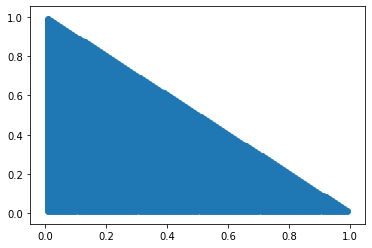

In [66]:
#plot only the parts of the mesh grid that I want to use as initial conditions
plt.scatter(C_points, M_points)

In [77]:
#run the model
from scipy.integrate import solve_ivp
a_current = 0.1 #NEED TO CHANGE
g_current = 0.1 #NEED TO CHANGE
z_current = 0 #NEED TO CHANGE
#v[1] = C, v[2] = M, v[3] = T
#input the equations into an initial value problem solver (default is RK45)
def rhs(s,v): 
    a = a_current 
    g = g_current
    z = z_current
    r = 0.55 # rate coral overgrow turf
    d = 0.24 # natural coral mortality rate
    y = 0.77 #rate macroalgae overgrow turf
    return [r*v[0]*v[2] + z*r*v[2] - d*v[0] - a*v[0]*v[1], a*v[0]*v[1] - (g*v[1])/(v[0]+v[2]) + y*v[1]*v[2],-r*v[0]*v[2] - z*r*v[2] + d*v[0] + (g*v[1])/(v[0]+v[2]) - y*v[1]*v[2]]
res = solve_ivp(rhs, (0, 5000), [C_points[0], M_points[0], T_points[0]]) #solves from t =0 -> t = 5000 and for initial values C_points, M_points, T_points
print(C_points[0],M_points[0],T_points[0]) #initial values given


0.01 0.01 0.98


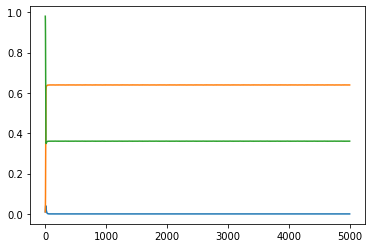

In [78]:
#plot the output
plt.plot(res.t, res.y.T)

In [80]:
#TO DO LIST:
#figure out a good way to save + plot the output from every single initial condition value on one plot
#figure out a better way to loop through the different parameter values as well?

In [ ]:
#Cole's code below here

In [4]:
def f(v, t0, k):
    # v has four components: v=[u, u'].
    u, udot = v[:2], v[2:]
    # We compute the second derivative u'' of u.
    udotdot = -k / m * udot
    udotdot[1] -= g #udotdot[1] = udotdot[1] - g
    # We return v'=[u', u''].
    return np.r_[udot, udotdot]

(0, 6)

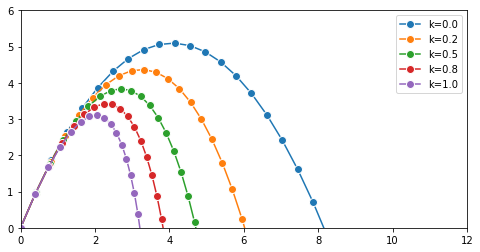

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.linspace(0., 3., 30)

# We simulate the system for different values of k.
for k in np.linspace(0., 1., 5):
    # We simulate the system and evaluate $v$ on the
    # given times.
    v = spi.odeint(f, v0, t, args=(k,)) #solver
    # We plot the particle's trajectory.
    ax.plot(v[:, 0], v[:, 1], 'o-', mew=1, ms=8,
            mec='w', label=f'k={k:.1f}')
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

In [ ]:
#old code that was half python, half R
x_coords = np.arange(0.01,1,0.01) #[start,stop)
y_coords = np.arange(0.01,1,0.01)
#make dataframe
d = {'Num': np.arange(1,((len(x_coords)*len(y_coords))+1),1), 'M1': np.repeat(x_coords,99), 'C1':np.repeat(0,99*99), 'T1':np.repeat(0,99*99)}
grid = pd.DataFrame(data = d)
#populate C column - want a lower triangle situation in an MxC graph
for i in range(0, len(x_coords)):
    val = x_coords[i]
    #want C+M in each row to be =< 1, hence the 100s
    grid.iloc[(((i)*99)):((i)*(99-1)),2] = np.concatenate([np.arange(0.01, 1-val, 0.01), np.repeat(100,i)], axis=0)

#remove the 100 rows
grid = grid[grid.C1 != 100]
grid = grid[-which(is.na(grid$Cinit)),] 

#populate T column
for(i in 1:dim(grid)[1]){
grid$Tinit[i] = 1 - grid$Minit[i] - grid$Cinit[i] #the sum of each row should be 1
grid$Tinit[i] = round(grid$Tinit[i],digits = 3)
